# Logistic Regression

Logistic regression is like linear regression, but for classification problems. It still produces a line, but the line is used to separate data between two categories of some sort, which requires a slightly different approach internally.

To illustrate logistic regression in a relevant example, let's fabricate some data that illustrates two categories of vehicles speeds: "slow" and "fast". And, we'll plot each point against two axes, one representing the distance to an upcoming bump in the road, and the other the size of the bump. In theory, cars should slow down when approaching a large bump, and slow down more the closer you get to it. This behavior could perhaps be learned from data from real drivers approaching real bumps.

We don't have a real dataset for this, but we can fabricate one. We'll use scikit-learn's "make_blobs" function to create a couple of clusters of each category ("fast" and "slow") near the corners of our graph:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs

# To generate our fabricated data set, we'll create two blobs of
# randomly distributed data at two corners (top left, bottom right) of the graph...
n_samples = 10000
centers = [(0.9, 0.05), (0.05, 0.94)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.4,
                  centers=centers, shuffle=False, random_state=42)

# Then filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(X, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# And convert the results back into numpy arrays:
X = np.array(features)
y = np.array(labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


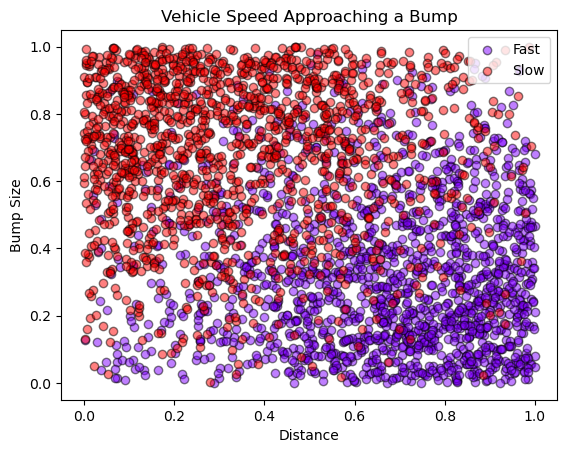

In [2]:
# Let's visualize our fabricated data set:

plt.figure()
y_unique = np.unique(y)
class_names = ['Fast', 'Slow']
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1], c=color,
                alpha=0.5, edgecolor='k',
                label=class_names[this_y])
plt.legend(loc="best")
plt.xlabel('Distance')
plt.ylabel('Bump Size')
plt.title("Vehicle Speed Approaching a Bump")
plt.show()

Creating a logistic regression model in scikit-learn is easy-peasy. There are several hyperparameters you can set on it, but most often the regularization term "C" is what people tinker with. It's default is 1.0, which we'll leave as-is for this simple problem.

After creating the classification model, we fit it to our data, which causes the model to learn the correct line for splitting the data as training data is fed into it.

In [3]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1.0)

logreg.fit(X, y)

LogisticRegression()

Let's visualize our results, by using our model to plot the predicted classification values for every point on the grid's mesh. We'll also visualize the training data over it, so we can see how well the predictions match the data.

C:\Users\Kevin\AppData\Local\Temp\ipykernel_16496\1061781703.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))


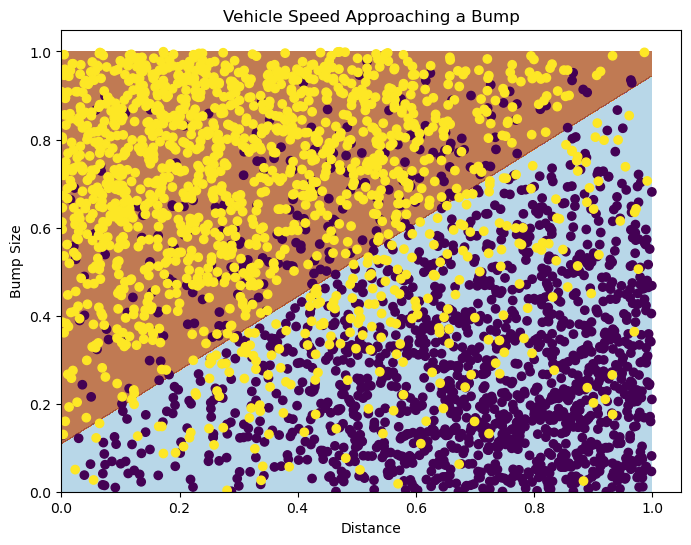

In [4]:
def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 1.0, 0.001),
                     np.arange(0, 1.0, 0.001))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.xlabel('Distance')
    plt.ylabel('Bump Size')
    plt.title("Vehicle Speed Approaching a Bump")
    plt.show()
    
plotPredictions(logreg)

Rather than just eyeballing the results, we can use train/test to quantify how well our model predicts classifications of "slow" or "fast" speeds based on bump size and distance. Scikit-learn has a handy train_test_split function we can use to randomly divide our data set into training data and testing data. So, we'll train (fit) our logistic regression model using only the training data, then call score() on it to measure its accuracy in predicting labels in the test data that it hasn't seen before.

The resulting score is just the mean accuracy of the predictions. So we see that on average, we predict correctly about 84% of the time. Remember this number, as we'll try different models on this same data set as we go through the course.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.840983606557377

To ensure we're not overfitting to one specific train/test split, we can do k-fold cross validation instead. Scikit-learn also makes this easy; its cross_val_score function can run cross validation on any machine learning model for any number of folds. Here, we'll do 5-fold cross validation, and cross_val_score will automatically split up the data set for us, for each fold.

It returns the mean accuracy for each fold, and we can boil that down to a single metric by just taking the mean score from all the folds.

In [6]:
from sklearn.model_selection import cross_val_score

fold_scores = cross_val_score(logreg, X, y, cv=5)
print (fold_scores)
print (np.mean(fold_scores))

[0.86885246 0.84098361 0.8407225  0.82758621 0.83415435]
0.8424598239521925
